In [3]:
import os
import pickle
import pandas as pd
import pandas_datareader as web
import datetime as dt

In [4]:
start = dt.date.today()-dt.timedelta(days=5*365)
end = dt.date.today()

In [28]:
spy = web.DataReader('SPY', 'iex', start, end)

In [29]:
spy['SPY pct_change'] = spy['close'].pct_change(1)

In [30]:
spy.tail()

,open,high,low,close,volume,SPY pct_change
date,,,,,,
2019-03-25,278.87,280.1853,277.64,279.04,85575197,-0.000752
2019-03-26,280.99,282.1800,279.56,281.12,68125920,0.007454
2019-03-27,281.11,281.7600,277.93,279.65,72224722,-0.005229
2019-03-28,280.35,281.2100,279.07,280.71,56238545,0.003790
2019-03-29,282.39,282.8400,281.14,282.48,82186806,0.006305


In [46]:
def get_pct_change_df(tickers):
    
    main_df = spy[['SPY pct_change']]
    
    for ticker in tickers:
        try:
            df = pd.read_pickle('stock_dfs/%s.pickle'%ticker)
#             print (df.tail())
            df['%s pct_change'%ticker] = df['close'].pct_change(1)
            df = df[['%s pct_change'%ticker]]
            main_df = main_df.join(df, how='outer')
        except:
            continue
        
#     if main_df.empty:
#         main_df = df
#     else:
    
        
    return main_df

In [47]:
with open('sp500tickers.pickle','rb') as f:
    tickers = pickle.load(f)

In [62]:
df = get_pct_change_df(tickers)

In [63]:
df.tail()

,SPY pct_change,MMM pct_change,ABT pct_change,ABBV pct_change,ABMD pct_change,ACN pct_change,ATVI pct_change,ADBE pct_change,AMD pct_change,AAP pct_change,...,WLTW pct_change,WYNN pct_change,XEL pct_change,XRX pct_change,XLNX pct_change,XYL pct_change,YUM pct_change,ZBH pct_change,ZION pct_change,ZTS pct_change
date,,,,,,,,,,,,,,,,,,,,,
2019-03-25,-0.000752,-0.007085,0.003335,-0.003134,-0.030909,-0.000968,0.002346,0.009935,-0.015169,0.017835,...,0.006758,-0.003935,0.000000,0.002255,-0.021751,-0.002595,0.000000,-0.000710,0.002521,0.000000
2019-03-26,0.007454,0.019832,0.009843,0.015721,-0.086904,0.011267,-0.011707,0.012659,-0.010782,0.002920,...,0.009955,0.007815,0.005081,0.028581,0.020140,0.016133,-0.002223,0.002607,0.028114,0.009088
2019-03-27,-0.005229,-0.000386,-0.003418,-0.010773,-0.033601,-0.002815,-0.011724,-0.012237,-0.031141,-0.008201,...,-0.004112,-0.006817,-0.007845,-0.008430,-0.011767,-0.001536,0.002329,-0.000236,-0.002446,-0.003036
2019-03-28,0.003790,0.006613,0.009018,0.000876,0.027172,0.051961,0.002197,0.004536,0.006830,0.011145,...,-0.006471,0.009094,-0.013179,0.015868,0.011427,0.013978,0.001616,0.002447,0.011143,0.008831
2019-03-29,0.006305,-0.003597,0.006294,0.007879,0.005953,0.005139,-0.001973,0.011232,0.018356,0.010548,...,0.003600,0.014453,0.000890,-0.000937,0.001738,-0.000379,0.006758,0.005829,0.000882,0.012879


In [64]:
df.tail()

,SPY pct_change,MMM pct_change,ABT pct_change,ABBV pct_change,ABMD pct_change,ACN pct_change,ATVI pct_change,ADBE pct_change,AMD pct_change,AAP pct_change,...,WLTW pct_change,WYNN pct_change,XEL pct_change,XRX pct_change,XLNX pct_change,XYL pct_change,YUM pct_change,ZBH pct_change,ZION pct_change,ZTS pct_change
date,,,,,,,,,,,,,,,,,,,,,
2019-03-25,-0.000752,-0.007085,0.003335,-0.003134,-0.030909,-0.000968,0.002346,0.009935,-0.015169,0.017835,...,0.006758,-0.003935,0.000000,0.002255,-0.021751,-0.002595,0.000000,-0.000710,0.002521,0.000000
2019-03-26,0.007454,0.019832,0.009843,0.015721,-0.086904,0.011267,-0.011707,0.012659,-0.010782,0.002920,...,0.009955,0.007815,0.005081,0.028581,0.020140,0.016133,-0.002223,0.002607,0.028114,0.009088
2019-03-27,-0.005229,-0.000386,-0.003418,-0.010773,-0.033601,-0.002815,-0.011724,-0.012237,-0.031141,-0.008201,...,-0.004112,-0.006817,-0.007845,-0.008430,-0.011767,-0.001536,0.002329,-0.000236,-0.002446,-0.003036
2019-03-28,0.003790,0.006613,0.009018,0.000876,0.027172,0.051961,0.002197,0.004536,0.006830,0.011145,...,-0.006471,0.009094,-0.013179,0.015868,0.011427,0.013978,0.001616,0.002447,0.011143,0.008831
2019-03-29,0.006305,-0.003597,0.006294,0.007879,0.005953,0.005139,-0.001973,0.011232,0.018356,0.010548,...,0.003600,0.014453,0.000890,-0.000937,0.001738,-0.000379,0.006758,0.005829,0.000882,0.012879


In [75]:
def compare_performance(stock_perf, bench_perf):
    if bench_perf > stock_perf:
        return -0.5
    else:
        return 0.5

In [76]:
for ticker in tickers:
    try:
        df['%s Comp'%ticker] = list(map(compare_performance, df['%s pct_change'%ticker], df['SPY pct_change']))
        df['%s Perf'%ticker] = df['%s Comp'%ticker].rolling(20).sum()
    except:
        continue

In [77]:
df[['SPY pct_change', 'MMM pct_change', 'MMM Comp','MMM Perf']].tail()

,SPY pct_change,MMM pct_change,MMM Comp,MMM Perf
date,,,,
2019-03-25,-0.000752,-0.007085,-0.5,-4.0
2019-03-26,0.007454,0.019832,0.5,-3.0
2019-03-27,-0.005229,-0.000386,0.5,-2.0
2019-03-28,0.003790,0.006613,0.5,-1.0
2019-03-29,0.006305,-0.003597,-0.5,-1.0


In [107]:
perf_df = pd.DataFrame()
for ticker in tickers:
    try:
        if perf_df.empty:
            perf_df = df[['%s Perf'%ticker]]
        else:
            perf_df = perf_df.join(df[['%s Perf'%ticker]], how='outer')
    except:
        continue                

In [116]:
perf_df.tail()

,MMM Perf,ABT Perf,ABBV Perf,ABMD Perf,ACN Perf,ATVI Perf,ADBE Perf,AMD Perf,AAP Perf,AES Perf,...,WLTW Perf,WYNN Perf,XEL Perf,XRX Perf,XLNX Perf,XYL Perf,YUM Perf,ZBH Perf,ZION Perf,ZTS Perf
date,,,,,,,,,,,,,,,,,,,,,
2019-03-25,-4.0,1.0,-2.0,-2.0,0.0,3.0,3.0,-2.0,0.0,4.0,...,0.0,-3.0,0.0,0.0,-1.0,2.0,2.0,-1.0,-5.0,6.0
2019-03-26,-3.0,2.0,-2.0,-2.0,1.0,2.0,3.0,-2.0,-1.0,5.0,...,1.0,-3.0,0.0,0.0,0.0,2.0,2.0,-1.0,-4.0,7.0
2019-03-27,-2.0,2.0,-2.0,-2.0,2.0,2.0,2.0,-2.0,-1.0,5.0,...,1.0,-3.0,0.0,0.0,-1.0,2.0,3.0,-1.0,-4.0,7.0
2019-03-28,-1.0,2.0,-2.0,-1.0,2.0,1.0,2.0,-2.0,-1.0,4.0,...,0.0,-2.0,-1.0,1.0,-1.0,3.0,2.0,-1.0,-4.0,7.0
2019-03-29,-1.0,1.0,-2.0,-2.0,1.0,0.0,3.0,-2.0,0.0,3.0,...,0.0,-1.0,-1.0,0.0,-2.0,2.0,2.0,-2.0,-4.0,7.0


In [117]:
perf_df.index

DatetimeIndex(['2014-02-10', '2014-02-11', '2014-02-12', '2014-02-13',
               '2014-02-14', '2014-02-18', '2014-02-19', '2014-02-20',
               '2014-02-21', '2014-02-24',
               ...
               '2019-03-18', '2019-03-19', '2019-03-20', '2019-03-21',
               '2019-03-22', '2019-03-25', '2019-03-26', '2019-03-27',
               '2019-03-28', '2019-03-29'],
              dtype='datetime64[ns]', name='date', length=1293, freq=None)

In [120]:
new = perf_df.transpose()

In [122]:
new.nlargest(10, '2019-03-29')

date,2014-02-10 00:00:00,2014-02-11 00:00:00,2014-02-12 00:00:00,2014-02-13 00:00:00,2014-02-14 00:00:00,2014-02-18 00:00:00,2014-02-19 00:00:00,2014-02-20 00:00:00,2014-02-21 00:00:00,2014-02-24 00:00:00,...,2019-03-18 00:00:00,2019-03-19 00:00:00,2019-03-20 00:00:00,2019-03-21 00:00:00,2019-03-22 00:00:00,2019-03-25 00:00:00,2019-03-26 00:00:00,2019-03-27 00:00:00,2019-03-28 00:00:00,2019-03-29 00:00:00
NFX Perf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
AMT Perf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,3.0,4.0,4.0,5.0,6.0,6.0,7.0,7.0,7.0
SNPS Perf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,5.0,5.0,6.0,5.0,5.0,6.0,6.0,7.0,7.0
ZTS Perf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,3.0,4.0,5.0,5.0,6.0,7.0,7.0,7.0,7.0
CMG Perf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,4.0,5.0,4.0,5.0,6.0,6.0,6.0,6.0,6.0
CSCO Perf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,5.0,6.0,5.0,5.0,5.0,5.0,5.0,6.0
PG Perf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,2.0,3.0,2.0,3.0,4.0,4.0,5.0,6.0,6.0
EW Perf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,2.0,3.0,4.0,5.0,6.0,6.0,5.0,5.0,5.0
FLT Perf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0
MDLZ Perf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,2.0,2.0,3.0,4.0,4.0,5.0,4.0,5.0


In [123]:
perf_df.tail()

,MMM Perf,ABT Perf,ABBV Perf,ABMD Perf,ACN Perf,ATVI Perf,ADBE Perf,AMD Perf,AAP Perf,AES Perf,...,WLTW Perf,WYNN Perf,XEL Perf,XRX Perf,XLNX Perf,XYL Perf,YUM Perf,ZBH Perf,ZION Perf,ZTS Perf
date,,,,,,,,,,,,,,,,,,,,,
2019-03-25,-4.0,1.0,-2.0,-2.0,0.0,3.0,3.0,-2.0,0.0,4.0,...,0.0,-3.0,0.0,0.0,-1.0,2.0,2.0,-1.0,-5.0,6.0
2019-03-26,-3.0,2.0,-2.0,-2.0,1.0,2.0,3.0,-2.0,-1.0,5.0,...,1.0,-3.0,0.0,0.0,0.0,2.0,2.0,-1.0,-4.0,7.0
2019-03-27,-2.0,2.0,-2.0,-2.0,2.0,2.0,2.0,-2.0,-1.0,5.0,...,1.0,-3.0,0.0,0.0,-1.0,2.0,3.0,-1.0,-4.0,7.0
2019-03-28,-1.0,2.0,-2.0,-1.0,2.0,1.0,2.0,-2.0,-1.0,4.0,...,0.0,-2.0,-1.0,1.0,-1.0,3.0,2.0,-1.0,-4.0,7.0
2019-03-29,-1.0,1.0,-2.0,-2.0,1.0,0.0,3.0,-2.0,0.0,3.0,...,0.0,-1.0,-1.0,0.0,-2.0,2.0,2.0,-2.0,-4.0,7.0


In [128]:
performers = perf_df.sort_values(by='2019-03-29', axis=1, ascending=False).tail(20)

In [132]:
perf_plotters = performers.transpose()

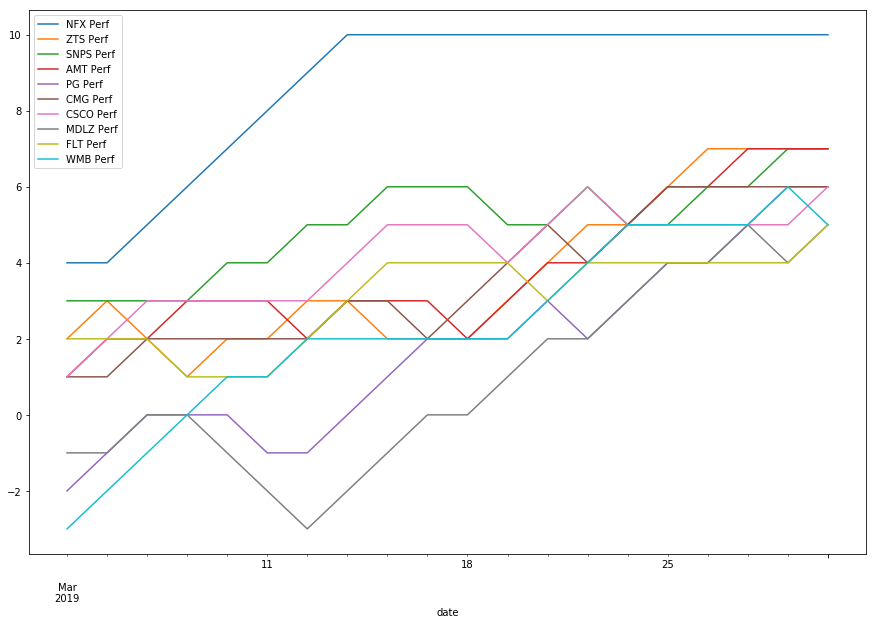

In [140]:
perf_plotters[:10].transpose().plot(figsize=(15,10))